This data set was released in october 2023. It contains 32 million 5-star ratings from more than 200000 users where every user rated at least 20 different films between january 1995 and october 2023. So it is a large dataset built for new research. It contains an id for each user and an another one for each movie, the genre or different genres of each movie and free users' tags given by users them selves for the movies that they rated. MovieLens datasets are used by some big companies for their recommandation systems. Moreover, they are often used by many machine learing reseachers to test and compare different algorithms. We followed James LE's article (2018) and Sophie LARUELLE's machine learning course (2022) to get an idea about these different systems and how to implement them to get usefull informations.

In [16]:
#ignorer warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
#ignorer les messages de télechargement
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")

import os
os.chdir('/Users/eskenderayadi/Library/CloudStorage/OneDrive-UPEC/2 - M2 Maserati/M2 Maserati DS/99 - M2 Projet Anglais/M2-Projet-Anglais')

### Statistiques descriptives

In [1]:
#diagramme en barres ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=ratings, x='rating', palette='viridis')
plt.title('Distribution des évaluations')
plt.xlabel('Évaluation')
plt.ylabel('Nombre d\'évaluations')
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 

In [23]:
#moyenne des évaluations
ratings.rating.mean()

3.581564453029317

On voit que les utilisateurs sont généreux sur leurs évaluations. La note la plus attribuée est 4/5, sachant que la note moyenne est 3,53/5 Mais prenons en compte le fait que, pour un même film, un utilisateur peut donner une note différente de celle donnée par un autre. Donc on ne peut pas se fier uniquement sur la notation pour savoir si les deux vont apprécier des films auxquels ils ont attribué une note égale ou même proche (par exemple 3,5 et 4).

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
#nltk.download('stopwords')
#nltk.download('punkt')

#### Stats desc.
##### Nuage de mots des _tags_

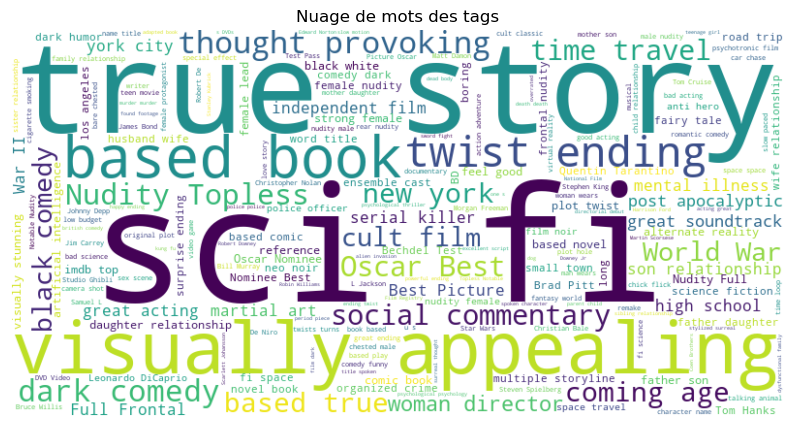

In [82]:
# Convert all tags to strings and handle NaN values
text = " ".join(str(tag) for tag in tags["tag"].dropna().str.split('|'))
word_tokens = word_tokenize(text)

# Convertir le texte en minuscules et supprimer les caractères spéciaux
stop_words = set(stopwords.words('english'))
filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_text))

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags')
plt.show()

Science fiction ("Sci fi") et true story sont les tags les plus présents avec les films adaptés d'un livre ("book based") et ceux inspirés par une histoire vraies ("based true"), sans ignorer l'attractivité visuelle du film ("visually appealing")

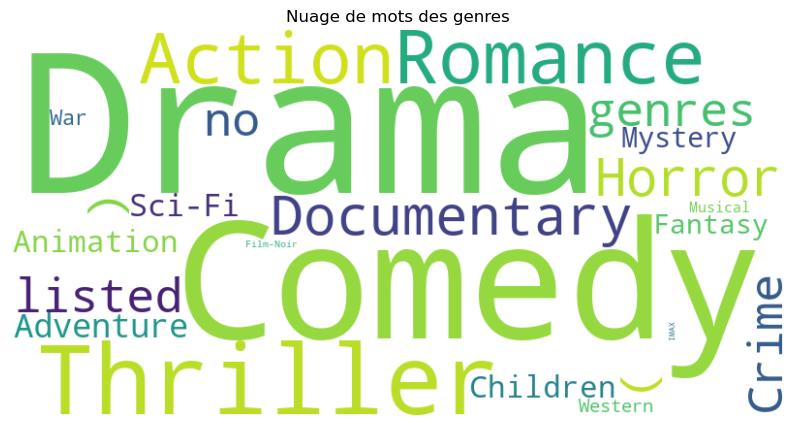

In [56]:
#nuage de mots des genres

text = " ".join(" ".join(genre) for genre in movies["genres"].dropna().str.split('|'))
word_tokens = word_tokenize(text)

# conter le nombre d'occurences de chaque genre
from collections import Counter
genre_counts = Counter(word_tokens)

filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

genre_counts = Counter(word_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_text)).generate_from_frequencies(genre_counts)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des genres')
plt.show()

Drama, documentaire et comédie sont les genres les plus présents.
***

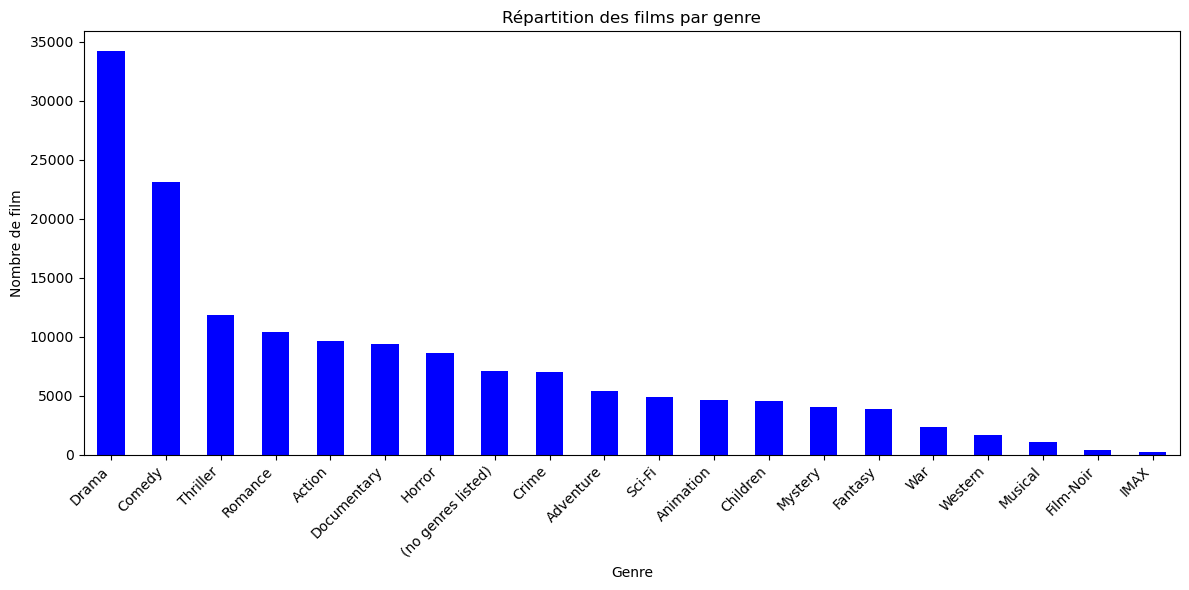

In [ ]:
# Supprimer les doublons pour ne garder qu'une ligne par film
unique_movies = movies.drop_duplicates(subset='movieId')

# Créer les colonnes binaires pour les genres
genres_dummies = unique_movies['genres'].str.get_dummies(sep='|')

# Compter combien de films appartiennent à chaque genre
genre_counts = genres_dummies.sum().sort_values(ascending=False)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='blue')
plt.title('Répartition des films par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de film')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Décomposition en valeurs singulières (SVD)

### 2. Avantages et Inconvénients

#### Points positifs de l'utilisation du SVD sur MovieLens :
1. Réduction de dimensionnalité efficace :
   MovieLens contient beaucoup d’utilisateurs et de films. SVD permet de représenter les interactions utilisateur-film dans un espace latent de plus faible dimension, capturant les préférences implicites.

2. Très bon modèle de base (baseline) : Il sert souvent de référence pour comparer d’autres approches plus complexes (comme les autoencodeurs ou les modèles deep learning).

3. Gère bien la disparité :
La matrice de notation (user × movie) est très creuse. SVD aide à reconstruire les valeurs manquantes en trouvant les patterns sous-jacents.

4. Implémentations efficaces :
Des versions optimisées existent (comme SVD++ dans Surprise, ou des implémentations via scikit-learn ou TensorFlow).

#### Limites et points de vigilance :
1. Besoin d’une matrice "pleine" :
L’algorithme SVD classique nécessite une matrice sans valeurs manquantes. Sur Movielens, on utilise souvent des variantes comme SVD imputation ou SVD sur la matrice factorisée via SGD (ex. : dans Surprise).

2. Pas adapté aux nouveaux utilisateurs ou films (cold start) :
Comme il se base uniquement sur les notations, un nouvel utilisateur (ou un film sans note) ne pourra pas être bien représenté.

3. Pas de prise en compte du contenu :
SVD ne considère pas les métadonnées (genre, âge, description des films...). Pour intégrer ce genre d'info, on part vers des modèles hybrides.



### 3. Définition mathématique

La factorisation de la matrice d'utilité s’appuie sur la décomposition en valeurs singulières (SVD), une technique qui permet d’identifier des structures latentes à partir d’une matrice de notation (utilisateur–item). Cette méthode consiste à décomposer une matrice 𝐴 en trois matrices :

Soit une matrice réelle $A \in \mathbb{R}^{m \times n}$, la décomposition en valeurs singulières (SVD) permet d’écrire :

$$
A = U \Sigma V^T
$$

où :
- $U \in \mathbb{R}^{m \times m}$ est une matrice orthogonale associée aux utilisateurs et aux facteurs latents,
- $V \in \mathbb{R}^{n \times n}$ est une matrice orthogonale contenant les valeurs singulières, qui mesurent l’importance relative de chaque facteur latent,
- $\Sigma \in \mathbb{R}^{m \times n}$ est une matrice diagonale contenant les valeurs singulières $\sigma_1 \geq \sigma_2 \geq \cdots \geq 0$ décrivant la correspondance entre les items et les facteurs latents.

Ces facteurs latents peuvent représenter des caractéristiques implicites des items, comme les genres de films. L’objectif de la SVD est donc de réduire la dimension de la matrice initiale tout en conservant les relations les plus significatives entre utilisateurs et items. Chaque utilisateur et chaque élément est alors projeté dans un espace vectoriel de dimension réduite, facilitant ainsi la modélisation des préférences et la prédiction des évaluations manquantes.

---

In [2]:
import os

import pandas as pd
import numpy as np

import random

# Mesure d'erreur (Erreur moyenne relative)
from sklearn.metrics import mean_squared_error

# SVD
from scipy.sparse.linalg import svds

# Pour les graphiques
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
import pandas as pd

# Charger les fichiers CSV dans des DataFrames pandas
link = "/data/"

# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [4]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
ratings.head().to_latex('ratings.tex', index=False, escape=False)

In [ ]:
movie_count = ratings["movie_id"].nunique()
user_count = ratings['user_id'].nunique()
rating_count = ratings.shape[0]

print("#users: "+ str(user_count))
print("#movies: "+ str(movie_count))
print("#ratings %: "+ str(rating_count / (user_count * movie_count) * 100))

print('{:,} ratings of {:,} films rated by {:,} users.'.format(rating_count, movie_count, user_count))

# Distribution des notes
p = ratings.groupby('rating')['rating'].agg(['count'])

#users: 6040
#movies: 3706
#ratings %: 4.468362562231285
1,000,209 ratings of 3,706 films rated by 6,040 users.


Nous avons 84 432 films et environs 32 millions de notes données par environ 200 000 utilisateurs. La matrice utilisateur x film est  très creuse car les couples utilisateurs x film sont connue à seulement 0,18%

###### !pip install seaborn


On va utiliser le package Surprise:
- documentation : https://surprise.readthedocs.io/en/stable/getting_started.html

Pour utiliser ce package on va devoir transformer le Dataframe en un objet Dataset

In [35]:
ratings.rating.unique()

array([5, 3, 4, 2, 1])

In [ ]:
from surprise import SVD, Dataset, Reader

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

In [ ]:
# sample random trainset and testset
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25, random_state=42) # test set is made of 25% of the ratings.

In [ ]:
# Create an SVD model
algo = SVD()

# Train the model on the trainset
algo.fit(trainset)

# Predict ratings for the testset
predictions = algo.test(testset)

# Compute and print RMSE
from surprise import accuracy
accuracy.rmse(predictions)

print("MSE:", accuracy.rmse(predictions)**2)

RMSE: 0.8777
RMSE: 0.8777
MSE: 0.7702972064164005


The SVD model trained on the train test generated randomly gives us a mean square error of 0.77 and a Root MSE of 0.88 which is correct when using this type and size of data.

In [ ]:
from sklearn.model_selection import GridSearchCV

from surprise.model_selection import cross_validate